# E Cigarette Smoke Free Indoor Air Clustering

## ML Assignment 5 : Random Forest

### Course code : CMPE-257
Group name : Spartans <br/>
        Members :
                   * SUDHA AMARNATH
                   * MUKESH RANJAN SAHAY
                   * THIRUMALAI NAMBI DOSS
                   * MUTHU KUMAR SUKUMARAN
                   
                   
### Team Contribution
a. Data preparation and analysing Measure Description - MUTHU KUMAR SUKUMARAN <br/>
b. Data Enrichment and plotting on maps - SUDHA AMARNATH <br/>
c. Data Enrichment using different datasets and correlation - THIRUMALAI NAMBI DOSS <br/> 
d. Apply Decision Tree and plotting the result - MUKESH RANJAN SAHAY <br/>


## Decision Tree

In general, a tree has many analogies in the real life and helps Machine Learning with both Classification and Regression. Decision Tree visually represents with the root at the top followed by the branches/edges. The data that contains 1 (Success) or 0 (Failure) which is called as binary variable is used in the decision tree. It helps to classify one of the binary value to provide clear understanding of the data set.

All the internal nodes are based on the binary conditions based on the list of categories/features that helps to make the final decision. The final split is known as the decision/leaf node which provides the successful data retrieved. Decision Tree algorithms is referred to as CART (Classification and Regression Trees).


**Advantages of CART**
* Simple to understand, visualize and interpret.
* Decision trees implicitly perform feature selection and variable screening.
* It can handle numerical and categorical data.
* It requires relatively less effort for data preparation.
* It can also resolve multi-output problems.
* Nonlinear relationships between parameters do not affect tree performance.


**Decision Tree Classification**

The main target of the classification tree is to classify the data with certain decisions based on the features in the dataset. Classification is the task of predicting a discrete class label. A classification algorithm may predict a continuous value, but the continuous value is in the form of a probability for a class label. This is also known as greedy algorithm as it recursively does binary splitting thus makes the root node the best predictor/classifier.

**Classification : G = sum(pk * (1 — pk))**

Maximum depth refers to the length of the longest path from the root to a leaf. It is important to know when to stop the splitting.

**Decision Tree Regression**

Regression tree are in general used to get the prediction continuous value for a certain use case. Regression is the task of predicting a continuous quantity. A regression algorithm may predict a discrete value, but the discrete value in the form of an integer quantity.

**Regression : sum(y — prediction)²**

**Note**: Classification predictions can be evaluated using accuracy, whereas regression predictions cannot

**Objective:**


The purpose of this assignment is to apply Decision Tree to classify a binary value or categorical value and also to discuss why we chose that attribute/feature and what we are trying to learn from the classification.




#### 1.  Data Story 

The STATE System houses current and historical state-level legislative data on tobacco use prevention and control policies. Data are reported on a quarterly basis. Data include information related to state legislation on smokefree indoor air in areas such as: Bars, Commercial Day Care Centers, Government Multi-Unit Housing, Government Worksites, Home-Based Day Care Centers, Hotels and Motels, Personal Vehicles, Private Multi-Unit Housing, Private Worksites, Restaurants, Bingo Halls, Casinos, Enclosed Arenas, Grocery Stores, Hospitals, Hospital Campuses, Malls, Mental Health Outpatient and Residential Facilities, Prisons, Public Transportation, Racetrack Casinos, Substance Abuse Outpatient and Residential Facilities.


As for the vaping trend analysis, we want to know what kinds of provision locations the e-cigarette trend is high for a given province. In this way, we could find where the e-cigarette smoking is banned, allowed of if there are any fines in the province. 


Following steps are done to arrive at the business conclusion.

1. Identifying your data story with your team
2. Selecting an initial strong data set to conduct all of your homeworks and term long project on.
3. Running linear regression on multiple features (one at a time).
4. Conducting data preparation on your data
5. Conducting data enrichment by adding one or more data sets to your base data set
6. Finding a latent manifold
7. Using the manifold to add features to your data set and run regression or clustering based on those new features.
8. Business Conclusion


#### 2. Dataset Selection 
### [Google Drive Dataset Link1](https://drive.google.com/open?id=14OlNrJvCG8YUnaovZD2uMpySM5UD-A1V) 
### [Google Drive Dataset Link2](https://drive.google.com/open?id=1SFMMrd4fL4J-l_bTiDtBUzMVDHqcdfok) 



### Importing Required Libraries

In [0]:
import random
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import seaborn as sns
import plotly.graph_objects as go
from IPython.display import Image

from scipy.spatial.distance import cdist
%matplotlib inline

# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import pandas as pd
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Load the data set**

In [0]:
# load the CSV file and create a new DataFrame out of it.
file1 = 'CDC_STATE_System_E-Cigarette_Legislation_-_Smokefree_Indoor_Air.csv'
link = 'https://drive.google.com/open?id=1i6qAx5aKxVEJXTXQ1LeOaClY_LryqSW5'
fluff, id = link.split('=')
print('File Name = ', file1)
print('File ID = ', id)
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(file1)  

#file1 = '/Users/admin/Desktop/aliDatasets/CDC_STATE_System_E-Cigarette_Legislation_-_Smokefree_Indoor_Air.csv'
#df = pd.read_csv(file1,low_memory=False, nrows=100000)
df = pd.read_csv(file1,low_memory=False)
df = df[df['YEAR'] >= 2017] 
df = df.sample(frac=1)
df = df.head(100000).reset_index(drop=True)
print(df.shape)
origdf = df
df.head(2)



File Name =  CDC_STATE_System_E-Cigarette_Legislation_-_Smokefree_Indoor_Air.csv
File ID =  1i6qAx5aKxVEJXTXQ1LeOaClY_LryqSW5
(98967, 23)


,YEAR,Quarter,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,DataSource,ProvisionGroupDesc,ProvisionDesc,ProvisionValue,Citation,ProvisionAltValue,DataType,Comments,Enacted_Date,Effective_Date,GeoLocation,DisplayOrder,TopicTypeId,TopicId,MeasureId,ProvisionGroupID,ProvisionID
0,2017,2,UT,Utah,Legislation - E-Cigarette - Smokefree Indoor Air,Private Worksites,OSH,Additional Requirements,Minimum Number of Employees Required (#),No Provision,NaN,0,Number,NaN,NaN,NaN,"(39.360700171000474, -111.58713063499971)",4,LEG,1042LEG,1006PWK,20GRP,686
1,2017,3,NM,New Mexico,Legislation - E-Cigarette - Smokefree Indoor Air,Commercial Day Care Centers,OSH,Penalties,Penalty to User,No Provision,NaN,0,Ranking,NaN,NaN,NaN,"(34.52088095200048, -106.24058098499967)",14,LEG,1042LEG,1008CDC,60GRP,608


### Preparing dataset
Replace the given LocationDesc value with the mapped equivalent, LocationID<br/>
Replace the given ProvisionGroupDesc value with the mapped equivalent, ProvisionGroupID<br/>
Replace the given ProvisionValue value with the mapped equivalent, ProvisionValueID<br/>
Replace the given MeasureDesc value with the mapped equivalent, MeasureDescID<br/>
Replace the given ProvisionDesc value with the mapped equivalent, ProvisionDescID<br/>


In [0]:
def mapLatitudeLongitude(df):
    global latMapping, lonMapping
    lat = []
    lon = []
    for row in df['GeoLocation']:
        try:
            lat.append(row.split(',')[0].strip('('))
            lon.append(row.split(',')[1].strip(')'))
        except:
            lat.append(np.NaN)
            lon.append(np.NaN)
    df['Latitude'] = lat
    df['Longitude'] = lon

    lat = df['Latitude'].unique().tolist()
    lon = df['Longitude'].unique().tolist()
    latMapping = dict( zip(lat,range(len(lat))) )
    lonMapping = dict( zip(lon,range(len(lon))) )

mapLatitudeLongitude(df)    
#print(latMapping)
#print(lonMapping)



In [0]:
def mapLocationID(df):
    global locationIndexList, locAbbrIndexList, latitudeIndexList, longitudeIndexList
    location_id = df['LocationDesc'].unique().tolist()
    mapping = dict( zip(location_id,range(len(location_id))) )
    df.replace({'location_id': mapping},inplace=True)
    LocationID = []
    for row in df['LocationDesc']:
        try:
            LocationID.append(mapping[row.strip()])
        except:
            LocationID.append(np.NaN)
    df['LocationID'] = LocationID

    locationIndexList = list(set(LocationID))
    latitudeIndexList = []
    longitudeIndexList = []
    locAbbrIndexList = []

    for i in locationIndexList:
      latitudeIndexList.append(df.loc[df['LocationID'] == i, 'Latitude'].iloc[0])
      longitudeIndexList.append(df.loc[df['LocationID'] == i, 'Longitude'].iloc[0])
      locAbbrIndexList.append(df.loc[df['LocationID'] == i, 'LocationAbbr'].iloc[0])

    latitudeIndexList = list(np.float_(latitudeIndexList))
    longitudeIndexList = list(np.float_(longitudeIndexList))

mapLocationID(df)

#print(locationIndexList)
#print(locAbbrIndexList)

#print(latitudeIndexList)
#print(longitudeIndexList)


In [0]:
def mapProvisionGroupId(df):
    provision_group_id = df['ProvisionGroupDesc'].unique().tolist()
    mapping = dict( zip(provision_group_id,range(len(provision_group_id))) )
    df.replace({'provision_group_id': mapping},inplace=True)

    ProvisionGroupID = []
    for row in df['ProvisionGroupDesc']:
        try:
            ProvisionGroupID.append(mapping[row.strip()])
        except:
            ProvisionGroupID.append(np.NaN)
    df['ProvisionGroupID'] = ProvisionGroupID
    
mapProvisionGroupId(df)

In [0]:
def mapProvisionValueId(df):
    provision_value_id = df['ProvisionValue'].unique().tolist()
    mapping = dict( zip(provision_value_id,range(len(provision_value_id))) )
    df.replace({'provision_value_id': mapping},inplace=True)

    ProvisionValueID = []
    for row in df['ProvisionValue']:
        try:
            ProvisionValueID.append(mapping[row.strip()])
        except:
            ProvisionValueID.append(np.NaN)
    df['ProvisionValueID'] = ProvisionValueID

mapProvisionValueId(df)

In [0]:
def mapMeasureDescId(df):
    measure_desc_id = df['MeasureDesc'].unique().tolist()
    mapping = dict( zip(measure_desc_id,range(len(measure_desc_id))) )
    df.replace({'measure_desc_id': mapping},inplace=True)

    MeasureDescID = []
    for row in df['MeasureDesc']:
        try:
            MeasureDescID.append(mapping[row.strip()])
        except:
            MeasureDescID.append(np.NaN)
    df['MeasureDescID'] = MeasureDescID

mapMeasureDescId(df)

In [0]:
def mapProvisionDescId(df):

    provision_desc_id = df['ProvisionDesc'].unique().tolist()
    mapping = dict( zip(provision_desc_id,range(len(provision_desc_id))) )
    df.replace({'provision_desc_id': mapping},inplace=True)

    ProvisionDescID = []
    for row in df['ProvisionDesc']:
        try:
            ProvisionDescID.append(mapping[row.strip()])
        except:
            ProvisionDescID.append(np.NaN)
    df['ProvisionDescID'] = ProvisionDescID

mapProvisionDescId(df)

In [0]:
df.head(2)

,Citation,Comments,DataSource,DataType,DisplayOrder,Effective_Date,Enacted_Date,GeoLocation,Latitude,LocationAbbr,LocationDesc,LocationID,Longitude,MeasureDesc,MeasureDescID,MeasureId,ProvisionAltValue,ProvisionDesc,ProvisionDescID,ProvisionGroupDesc,ProvisionGroupID,ProvisionID,ProvisionValue,ProvisionValueID,Quarter,TopicDesc,TopicId,TopicTypeId,YEAR
0,NaN,NaN,OSH,Number,4,NaN,NaN,"(39.360700171000474, -111.58713063499971)",39.360700171000474,UT,Utah,0,-111.58713063499971,Private Worksites,0,1006PWK,0,Minimum Number of Employees Required (#),0,Additional Requirements,0,686,No Provision,0,2,Legislation - E-Cigarette - Smokefree Indoor Air,1042LEG,LEG,2017
1,NaN,NaN,OSH,Ranking,14,NaN,NaN,"(34.52088095200048, -106.24058098499967)",34.52088095200048,NM,New Mexico,1,-106.24058098499967,Commercial Day Care Centers,1,1008CDC,0,Penalty to User,1,Penalties,1,608,No Provision,0,3,Legislation - E-Cigarette - Smokefree Indoor Air,1042LEG,LEG,2017


### Remove a row or a column from  dataframe which has a NaN or no values in it.


In [0]:
#ProvisionID is ProvisionDesc
#LocationID is LocationDesc
#ProvisionGroupID is ProvisionGroupDesc
#ProvisionValueID is ProvisionValue
#ProvisionDescID is ProvisionDesc
#MeasureDescID is MeasureDesc

df.dropna(subset = ['ProvisionID', 'LocationID', 'ProvisionGroupID', 'ProvisionValueID', 'MeasureDescID','ProvisionDescID'], inplace = True)
print(df.shape)
df.head(20)

(98967, 29)


,YEAR,Quarter,LocationAbbr,LocationDesc,TopicDesc,MeasureDesc,DataSource,ProvisionGroupDesc,ProvisionDesc,ProvisionValue,Citation,ProvisionAltValue,DataType,Comments,Enacted_Date,Effective_Date,GeoLocation,DisplayOrder,TopicTypeId,TopicId,MeasureId,ProvisionGroupID,ProvisionID,Latitude,Longitude,LocationID,ProvisionValueID,MeasureDescID,ProvisionDescID
0,2017,2,UT,Utah,Legislation - E-Cigarette - Smokefree Indoor Air,Private Worksites,OSH,Additional Requirements,Minimum Number of Employees Required (#),No Provision,NaN,0,Number,NaN,NaN,NaN,"(39.360700171000474, -111.58713063499971)",4,LEG,1042LEG,1006PWK,0,686,39.360700171000474,-111.58713063499971,0,0,0,0
1,2017,3,NM,New Mexico,Legislation - E-Cigarette - Smokefree Indoor Air,Commercial Day Care Centers,OSH,Penalties,Penalty to User,No Provision,NaN,0,Ranking,NaN,NaN,NaN,"(34.52088095200048, -106.24058098499967)",14,LEG,1042LEG,1008CDC,1,608,34.52088095200048,-106.24058098499967,1,0,1,1
2,2017,3,KY,Kentucky,Legislation - E-Cigarette - Smokefree Indoor Air,Government Multi-Unit Housing,OSH,Enforcement,Signage Required,No Provision,NaN,0,Yes/No,NaN,NaN,NaN,"(37.645970271000465, -84.77497104799966)",5,LEG,1042LEG,1004GMH,2,614,37.645970271000465,-84.77497104799966,2,0,2,2
3,2017,4,NV,Nevada,Legislation - E-Cigarette - Smokefree Indoor Air,Restaurants,OSH,Restriction Areas,Type of Restriction in Restaurant Employee Area,No Provision,NaN,0,Ranking,NaN,NaN,NaN,"(39.493240390000494, -117.07184056399967)",4,LEG,1042LEG,1007RES,3,703,39.493240390000494,-117.07184056399967,3,0,3,3
4,2018,4,IA,Iowa,Legislation - E-Cigarette - Smokefree Indoor Air,Restaurants,OSH,Penalties,Penalty to User,No Provision,NaN,0,Ranking,NaN,NaN,NaN,"(42.46940091300047, -93.81649055599968)",16,LEG,1042LEG,1007RES,1,715,42.46940091300047,-93.81649055599968,4,0,3,1
5,2018,4,AR,Arkansas,Legislation - E-Cigarette - Smokefree Indoor Air,Restaurants,OSH,Additional Requirements,Percent Smokefree Seating,No Provision,NaN,0,Percentage,NaN,NaN,NaN,"(34.74865012400045, -92.27449074299966)",8,LEG,1042LEG,1007RES,0,707,34.74865012400045,-92.27449074299966,5,0,3,4
6,2017,2,KS,Kansas,Legislation - E-Cigarette - Smokefree Indoor Air,Hotels and Motels,OSH,Penalties,Maximum Penalty ($),No Provision,NaN,0,Money,NaN,NaN,NaN,"(38.34774030000045, -98.20078122699965)",12,LEG,1042LEG,1010HNM,1,658,38.34774030000045,-98.20078122699965,6,0,4,5
7,2019,3,NV,Nevada,Legislation - E-Cigarette - Smokefree Indoor Air,Commercial Day Care Centers,OSH,Vehicles,Level of Offense,No Provision,NaN,0,Ranking,NaN,NaN,NaN,"(39.493240390000494, -117.07184056399967)",7,LEG,1042LEG,1008CDC,4,601,39.493240390000494,-117.07184056399967,3,0,1,6
8,2018,1,MD,Maryland,Legislation - E-Cigarette - Smokefree Indoor Air,Commercial Day Care Centers,OSH,Penalties,Penalty to User,No Provision,NaN,0,Ranking,NaN,NaN,NaN,"(39.29058096400047, -76.60926011099963)",14,LEG,1042LEG,1008CDC,1,608,39.29058096400047,-76.60926011099963,7,0,1,1
9,2017,4,PW,Palau,Legislation - E-Cigarette - Smokefree Indoor Air,Home-based Day Care Centers,OSH,Vehicles,Type of Restriction in Home-Based Day Care Veh...,No Provision,NaN,0,Ranking,NaN,NaN,NaN,"(7.514979999999999, 134.58251999999993)",5,LEG,1042LEG,1009HDC,4,635,7.514979999999999,134.58251999999993,8,0,5,7


### Set cluster data - Create a cluster data frame cdf having columns `LocationID` and `MeasureDescID`


In [0]:

df_col_value_1 = 'LocationID'
df_col_value_2 = 'MeasureDescID'
# create the cluster data frame cdf
cdf = df.loc[:,[df_col_value_1, df_col_value_2]]
cdf.head()



,LocationID,MeasureDescID
0,0,0
1,1,1
2,2,2
3,3,3
4,4,3


In [0]:
def getRowIndex(ndf, ll):
  ndflocList = ndf['LocationID'].tolist()
  return ndflocList.index(ll)


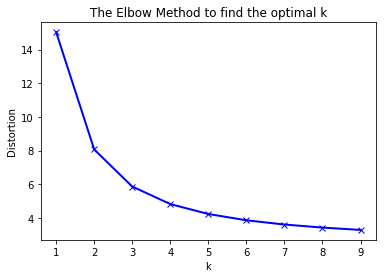

In [0]:
from time import time
from sklearn import mixture
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.linear_model import LinearRegression

distortions=[]
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(cdf)
    kmeans.fit(cdf)
    distortions.append(sum(np.min(cdist(cdf, kmeans.cluster_centers_, 'euclidean'), axis=1)) / cdf.shape[0])
# Plot the elbow
plt.plot(K, distortions, 'bx-', linewidth=2)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method to find the optimal k')
plt.show()

In [0]:
N = 2
print('Selecting optimum N value =', N)
print('Found distortion from elbow method for',N, 'clusters =', distortions[N-1])


Selecting optimum N value = 2
Found distortion from elbow method for 2 clusters = 8.067885704506189


In [0]:
def plot_figure(cdf_col1, cdf_col2,labels,centroids=[]):    
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 8))
    plt.scatter(cdf_col1, cdf_col2, c=labels, cmap='rainbow', s = 10)
    if len(centroids) > 0:
        plt.scatter(centroids[:, 0], centroids[:, 1], s = 100, c = 'black', label = 'Centroids', marker = 'o')
        plt.legend(loc=(1.05,0.5))
    plt.xlabel(cdf_col1.name)
    plt.ylabel(cdf_col2.name)
    plt.show()

In [0]:
metricsdf = pd.DataFrame(index=['KMEANS','GMM', 'MBK'], 
                         columns=['ARI','MI','HCV','FM','CH','DB'])

XX = cdf[df_col_value_1]
YY = cdf[df_col_value_2]

# intially all cells are NaN
metricsdf

,ARI,MI,HCV,FM,CH,DB
KMEANS,NaN,NaN,NaN,NaN,NaN,NaN
GMM,NaN,NaN,NaN,NaN,NaN,NaN
MBK,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
def calcMetrics(algorithm):
    # Get metrics data for the algorithms
    metricsdf.loc[algorithm,'ARI'] = metrics.adjusted_rand_score(YY, labels)
    metricsdf.loc[algorithm,'MI']  = metrics.adjusted_mutual_info_score(YY, labels)
    metricsdf.loc[algorithm,'HCV'] = metrics.homogeneity_score(YY, labels)
    metricsdf.loc[algorithm,'FM'] = metrics.fowlkes_mallows_score(YY, labels)
    metricsdf.loc[algorithm,'CH'] = metrics.calinski_harabasz_score(cdf, labels)
    metricsdf.loc[algorithm,'DB'] = metrics.davies_bouldin_score(cdf, labels)
    return


Time taken to train with GMM Model is 0.25 seconds


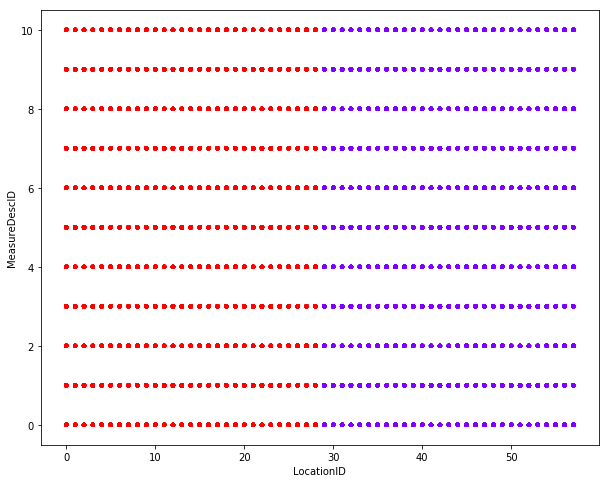

In [0]:
# N is taken from elbow method that was found using k-means
from sklearn import mixture
gmm = mixture.GaussianMixture(n_components=N, covariance_type='tied', random_state = 0)
t0 = time()
gmm.fit(cdf)
train_time = time() - t0
print("\nTime taken to train with GMM Model is %0.2f seconds" % train_time)
labels = gmm.predict(cdf)
calcMetrics('GMM')
plot_figure(cdf[df_col_value_1], cdf[df_col_value_2], labels)

### Bar graph showing the States Location Distribution

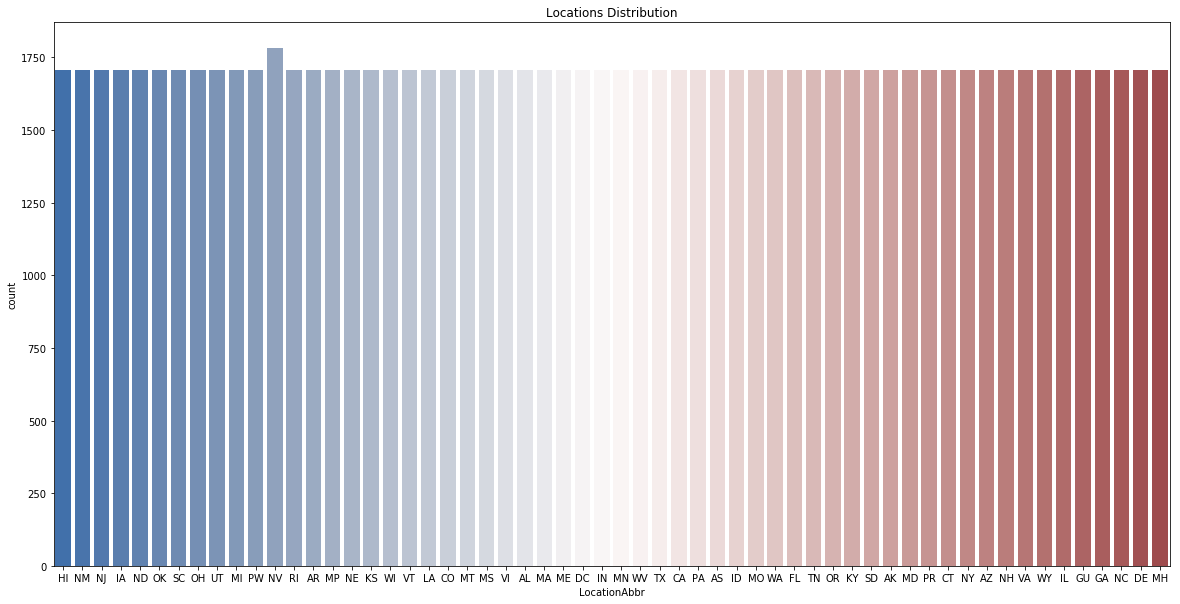

In [0]:
f, ax = plt.subplots(1,1, figsize = (20, 10))
sns.countplot(x=df['LocationAbbr'], ax = ax, palette="vlag")
ax.set_title('Locations Distribution')
plt.show()


### Bar graph showing the number of occurance of the Measure Description Distributions.


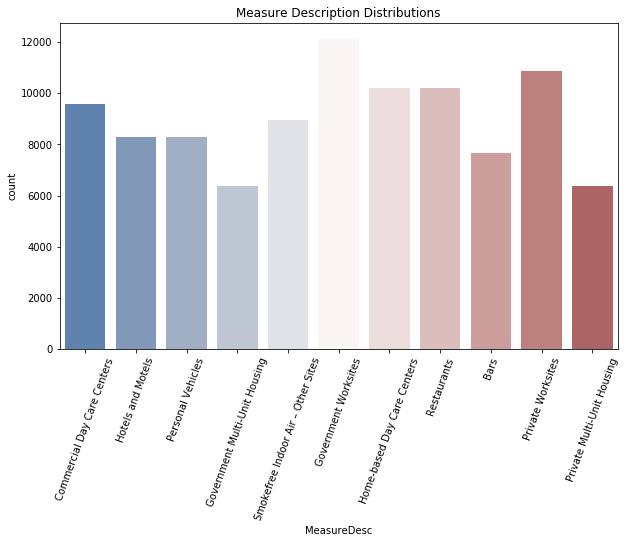

In [0]:
f, ax = plt.subplots(1,1, figsize = (10, 6))
sns.countplot(x=df['MeasureDesc'], ax = ax, palette="vlag")
ax.tick_params('x', rotation = 70)
ax.set_title('Measure Description Distributions')
plt.show()

### Bar graph showing the number of occurance of the Provision Description Distributions.


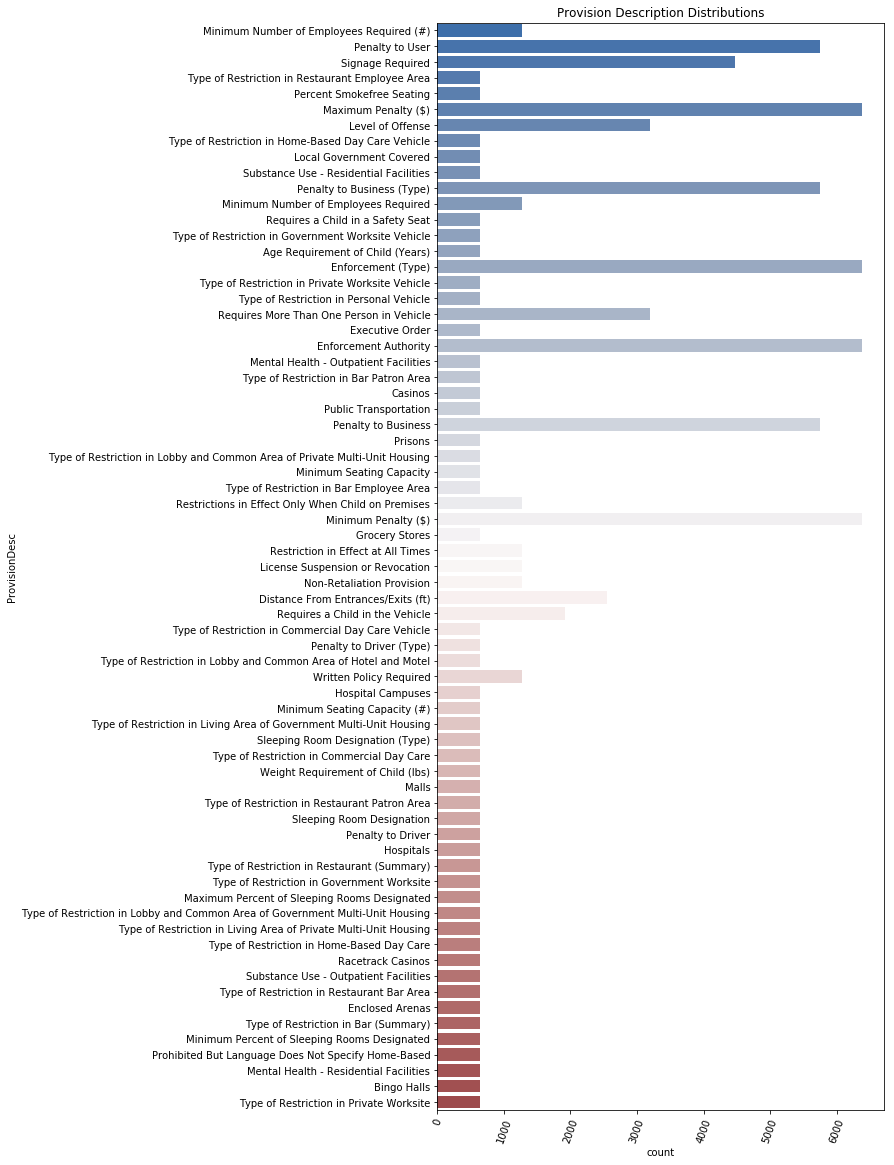

In [0]:
f, ax = plt.subplots(1,1, figsize = (8, 20))
sns.countplot(y=df['ProvisionDesc'], ax = ax, palette="vlag")
ax.tick_params('x', rotation = 70)
ax.set_title('Provision Description Distributions')
plt.show()

### Data Enrichment

In [0]:

rdf = df.groupby(["LocationID", "MeasureDesc"]).size().reset_index(name="Restricted")

indexNames = rdf[(rdf['MeasureDesc'] != "Bars") & (rdf['MeasureDesc'] != "Restaurants") & (rdf['MeasureDesc'] != "Government Worksites") & (rdf['MeasureDesc'] != "Private Worksites")].index
rdf.drop(indexNames , inplace=True)
print(rdf.shape)
print(rdf.head())

bannedList = ['Bars', 'Restaurants', 'Government Worksites', 'Private Worksites']

ndf = pd.DataFrame(rdf.LocationID.unique(), columns =['LocationID'])
for bl in bannedList:
  ndf[bl] = 0

locList = ndf.LocationID.unique().tolist()

for ll in locList:
    for bl in bannedList:
        try:
          val = rdf.loc[(rdf['LocationID'] == ll) & (rdf['MeasureDesc'] == bl), 'Restricted'].values[0]
          rowindex = getRowIndex(ndf, ll)
          if rowindex != -1:
            ndf.set_value(rowindex, bl, val)
          else:
            print(False, ndf.at[ll, 'LocationID'])
        except:
          ndf.set_value(rowindex, bl, 0)

ndf = ndf.fillna(0)
ndf.head()


(232, 3)
    LocationID           MeasureDesc  Restricted
0            0                  Bars         132
3            0  Government Worksites         209
8            0     Private Worksites         187
9            0           Restaurants         176
11           1                  Bars         132


,LocationID,Bars,Restaurants,Government Worksites,Private Worksites
0,0,132,176,209,187
1,1,132,176,209,187
2,2,132,176,209,187
3,3,143,188,220,197
4,4,132,176,209,187


## Pair Plot 

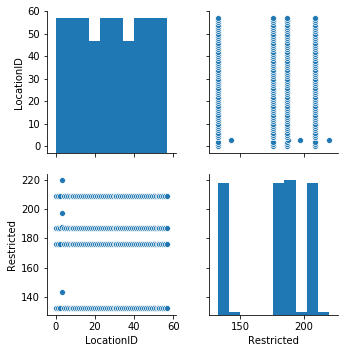

In [0]:
import seaborn as sns #  seaborn package for visualization

# Pairplot to see how data is distrubuted.
g = sns.pairplot(rdf)

### Enrichement with new data set for only Bars, Restaurants and Worksites

In [0]:
for bl in bannedList:        
  ndf[bl] = pd.to_numeric(ndf[bl], errors='ignore')          

ndf['Restricted'] = ndf['Bars'] + ndf['Restaurants'] + ndf['Government Worksites'] + ndf['Private Worksites']

ndf['Latitude'] = ''
ndf['Longitude'] = ''


loc = ndf['LocationID'].unique().tolist()
locMapping = dict( zip(loc,range(len(loc))) )

#print(locationIndexList)
#print(latitudeIndexList)
#print(longitudeIndexList)
#print(locAbbrIndexList)


for ll in locList:
    locidxval = locationIndexList[ll]
    locidxvalndf = locList.index(ll)
    latval = latitudeIndexList[locidxval]
    lonval = longitudeIndexList[locidxval]
    abbval = locAbbrIndexList[locidxval]
    ndf.set_value(locidxvalndf, 'Latitude', latval )
    ndf.set_value(locidxvalndf, 'Longitude', lonval )
    ndf.set_value(locidxvalndf, 'LocationAbbr', abbval )
    
ndf.head(100)

,LocationID,Bars,Restaurants,Government Worksites,Private Worksites,Restricted,Latitude,Longitude,LocationAbbr
0,0,132,176,209,187,704,39.3607,-111.587,UT
1,1,132,176,209,187,704,34.5209,-106.241,NM
2,2,132,176,209,187,704,37.646,-84.775,KY
3,3,143,188,220,197,748,39.4932,-117.072,NV
4,4,132,176,209,187,704,42.4694,-93.8165,IA
5,5,132,176,209,187,704,34.7487,-92.2745,AR
6,6,132,176,209,187,704,38.3477,-98.2008,KS
7,7,132,176,209,187,704,39.2906,-76.6093,MD
8,8,132,176,209,187,704,7.51498,134.583,PW
9,9,132,176,209,187,704,38.6655,-80.7126,WV


### Map Visualization pre enrichment - It only has Bars, Restaurants and Worksites

In [0]:
for col in ndf.columns:
    ndf[col] = ndf[col].astype(str)

ndf['text'] = ndf['LocationAbbr'] + '<br>' + \
    'Bars: ' + ndf['Bars'] + '<br>' + 'Restaurants: ' + ndf['Restaurants'] + '<br>' + \
    'Government Worksites: ' + ndf['Government Worksites'] + '<br>' + 'Private Worksites: ' + ndf['Private Worksites'] + '<br>'

fig = go.Figure(data=go.Choropleth(
    locations=ndf['LocationAbbr'],
    z=ndf['Restricted'].astype(float),
    locationmode='USA-states',
    colorscale='Earth',
    zmin = min(ndf['Restricted'].astype(float)) - 0,
    zmax = max(ndf['Restricted'].astype(float)),
    autocolorscale=False,
    text=ndf['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Restricted"
))

fig.update_layout(
    title_text='Comprehensive = Restricted in worksites, restaurants, and bars as of Q3 2019.<br>(Hover for breakdown)',
    autosize=False,
    width=1200,
    height=800,
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

### Data Enrichement - to merge Two data sets

In [0]:

file2 = 'CDC_STATE_System_E-Cigarette_Legislation_-_Smokefree_Campus.csv'
link = 'https://drive.google.com/open?id=1SFMMrd4fL4J-l_bTiDtBUzMVDHqcdfok'
fluff, id = link.split('=')
print('File Name = ', file2)
print('File ID = ', id)
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile(file2)  

sf = pd.read_csv(file2,low_memory=False)
sf = sf[sf['YEAR'] >= 2017] 
sf = sf.sample(frac=1)
sf = sf.head(100000).reset_index(drop=True)
print(sf.corrwith(origdf, axis = 1))
df = pd.concat([origdf, sf])

print(sf.shape)
print(df.shape)

# Create indices for df
mapLatitudeLongitude(df)    
mapLocationID(df)
mapProvisionGroupId(df)
mapProvisionValueId(df)
mapMeasureDescId(df)
mapProvisionDescId(df)

df.head(5)


File Name =  CDC_STATE_System_E-Cigarette_Legislation_-_Smokefree_Campus.csv
File ID =  1SFMMrd4fL4J-l_bTiDtBUzMVDHqcdfok
0        0.997963
1        0.999912
2        0.999520
3        0.997773
4        0.995699
5        0.997447
6        0.998874
7        0.999677
8        0.999721
9        0.999316
10       0.999302
11       0.999070
12       0.995181
13       0.996448
14       0.994305
15       0.997126
16       0.999249
17       0.997848
18       0.999521
19       0.999717
20       0.997603
21       0.998296
22       0.996581
23       0.993972
24       0.997431
25       0.997521
26       0.998359
27       0.998272
28       0.999731
29       0.997653
           ...   
98937         NaN
98938         NaN
98939         NaN
98940         NaN
98941         NaN
98942         NaN
98943         NaN
98944         NaN
98945         NaN
98946         NaN
98947         NaN
98948         NaN
98949         NaN
98950         NaN
98951         NaN
98952         NaN
98953         NaN
98954         

,Citation,Comments,DataSource,DataType,DisplayOrder,Effective_Date,Enacted_Date,GeoLocation,Latitude,LocationAbbr,LocationDesc,LocationID,Longitude,MeasureDesc,MeasureDescID,MeasureId,ProvisionAltValue,ProvisionDesc,ProvisionDescID,ProvisionGroupDesc,ProvisionGroupID,ProvisionID,ProvisionValue,ProvisionValueID,Quarter,TopicDesc,TopicId,TopicTypeId,YEAR
0,NaN,NaN,OSH,Number,4,NaN,NaN,"(39.360700171000474, -111.58713063499971)",39.360700171000474,UT,Utah,0,-111.58713063499971,Private Worksites,0,1006PWK,0,Minimum Number of Employees Required (#),0,Additional Requirements,0,686,No Provision,0,2,Legislation - E-Cigarette - Smokefree Indoor Air,1042LEG,LEG,2017
1,NaN,NaN,OSH,Ranking,14,NaN,NaN,"(34.52088095200048, -106.24058098499967)",34.52088095200048,NM,New Mexico,1,-106.24058098499967,Commercial Day Care Centers,1,1008CDC,0,Penalty to User,1,Penalties,1,608,No Provision,0,3,Legislation - E-Cigarette - Smokefree Indoor Air,1042LEG,LEG,2017
2,NaN,NaN,OSH,Yes/No,5,NaN,NaN,"(37.645970271000465, -84.77497104799966)",37.645970271000465,KY,Kentucky,2,-84.77497104799966,Government Multi-Unit Housing,2,1004GMH,0,Signage Required,2,Enforcement,2,614,No Provision,0,3,Legislation - E-Cigarette - Smokefree Indoor Air,1042LEG,LEG,2017
3,NaN,NaN,OSH,Ranking,4,NaN,NaN,"(39.493240390000494, -117.07184056399967)",39.493240390000494,NV,Nevada,3,-117.07184056399967,Restaurants,3,1007RES,0,Type of Restriction in Restaurant Employee Area,3,Restriction Areas,3,703,No Provision,0,4,Legislation - E-Cigarette - Smokefree Indoor Air,1042LEG,LEG,2017
4,NaN,NaN,OSH,Ranking,16,NaN,NaN,"(42.46940091300047, -93.81649055599968)",42.46940091300047,IA,Iowa,4,-93.81649055599968,Restaurants,3,1007RES,0,Penalty to User,1,Penalties,1,715,No Provision,0,4,Legislation - E-Cigarette - Smokefree Indoor Air,1042LEG,LEG,2018


### Correlation map for the data frame columns

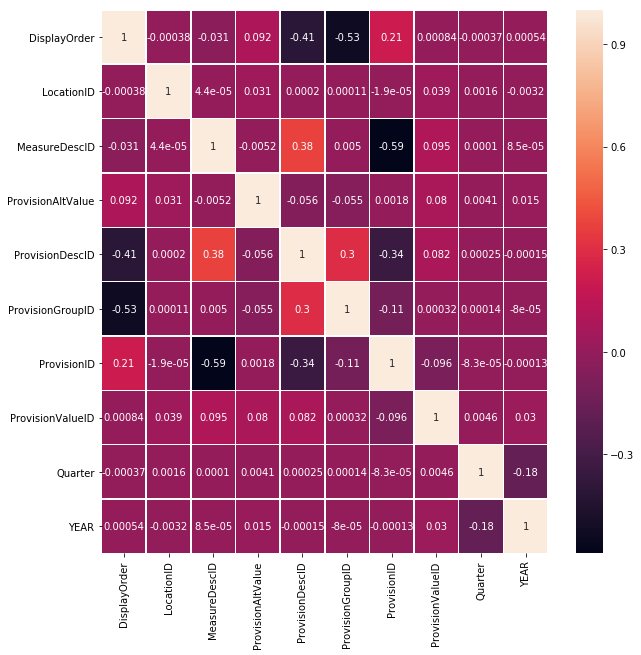

In [0]:

Cor = df[df.columns] 
#Calculate the correlation of the above variables
cor = Cor.corr() 
 #Plot the correlation as heat map
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(cor,annot=True,linewidths=.5, ax=ax)

### Post Data Enrichment: Bar Graph showing Messure Description (It includes Public and Private Schools now)

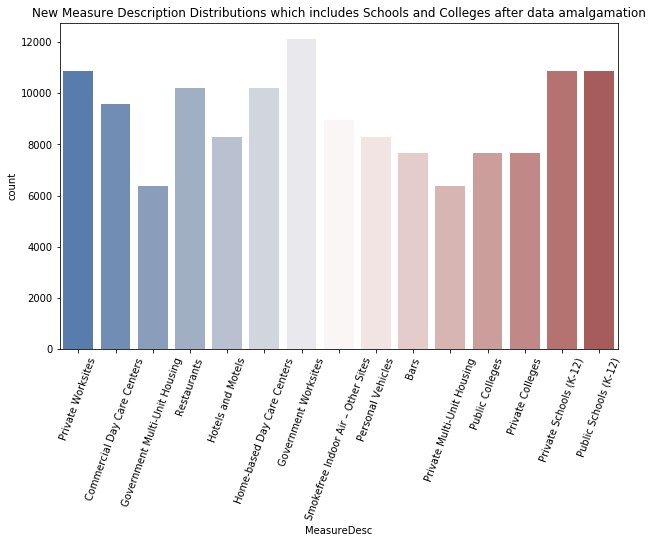

In [0]:
f, ax = plt.subplots(1,1, figsize = (10, 6))
sns.countplot(x=df['MeasureDesc'], ax = ax, palette="vlag")
ax.tick_params('x', rotation = 70)
ax.set_title('New Measure Description Distributions which includes Schools and Colleges after data amalgamation')
plt.show()

### Data Enrichment

In [0]:

rdf = df.groupby(["LocationID", "MeasureDesc"]).size().reset_index(name="Restricted")

indexNames = rdf[(rdf['MeasureDesc'] != "Bars") & \
                 (rdf['MeasureDesc'] != "Restaurants") & \
                 (rdf['MeasureDesc'] != "Government Worksites") & \
                 (rdf['MeasureDesc'] != "Private Worksites") & \
                 (rdf['MeasureDesc'] != "Public Colleges") & \
                 (rdf['MeasureDesc'] != "Private Colleges") & \
                 (rdf['MeasureDesc'] != "Private Schools (K-12)") & \
                 (rdf['MeasureDesc'] != "Public Schools (K-12)")].index
rdf.drop(indexNames , inplace=True)
print(rdf.shape)
print(rdf.head(8))

bannedList = ['Bars', 'Restaurants', 'Government Worksites', 'Private Worksites', \
              'Public Colleges', 'Public Schools (K-12)', 'Private Colleges', 'Private Schools (K-12)']

ndf = pd.DataFrame(rdf.LocationID.unique(), columns =['LocationID'])
for bl in bannedList:
  ndf[bl] = 0

locList = ndf.LocationID.unique().tolist()

for ll in locList:
    for bl in bannedList:
        try:
          val = rdf.loc[(rdf['LocationID'] == ll) & (rdf['MeasureDesc'] == bl), 'Restricted'].values[0]
          rowindex = getRowIndex(ndf, ll)
          if rowindex != -1:
            ndf.set_value(rowindex, bl, val)
          else:
            print(False, ndf.at[ll, 'LocationID'])
        except:
          ndf.set_value(rowindex, bl, 0)

ndf = ndf.fillna(0)

print('\nNew NDF data structure includes all Public and Private Schools along with Bars, Restaurants, Worksites\n')
ndf.head()

(464, 3)
    LocationID             MeasureDesc  Restricted
0            0                    Bars         132
3            0    Government Worksites         209
7            0        Private Colleges         132
9            0  Private Schools (K-12)         187
10           0       Private Worksites         187
11           0         Public Colleges         132
12           0   Public Schools (K-12)         187
13           0             Restaurants         176

New NDF data structure includes all Public and Private Schools along with Bars, Restaurants, Worksites



,LocationID,Bars,Restaurants,Government Worksites,Private Worksites,Public Colleges,Public Schools (K-12),Private Colleges,Private Schools (K-12)
0,0,132,176,209,187,132,187,132,187
1,1,132,176,209,187,132,187,132,187
2,2,132,176,209,187,132,187,132,187
3,3,143,188,220,197,142,199,132,199
4,4,132,176,209,187,132,187,132,187


### Total Restricted count of Bars, Restaurants, Worksites and Scools are calculated - post enrichment

In [0]:
for bl in bannedList:        
  ndf[bl] = pd.to_numeric(ndf[bl], errors='ignore')          

bannedList = ['Bars', 'Restaurants', 'Government Worksites', 'Private Worksites', \
              'Public Colleges', 'Public Schools (K-12)', 'Private Colleges', 'Private Schools (K-12)']

ndf['RestrictedAdults'] = ndf['Bars'] + ndf['Restaurants'] + ndf['Government Worksites'] + ndf['Private Worksites']
ndf['RestrictedYouth'] = ndf['Public Colleges'] + ndf['Public Schools (K-12)'] + ndf['Private Colleges'] + ndf['Private Schools (K-12)']

ndf['RestrictedTotal'] = ndf['RestrictedAdults'] + ndf['RestrictedYouth']

ndf['Latitude'] = ''
ndf['Longitude'] = ''

loc = ndf['LocationID'].unique().tolist()
locMapping = dict( zip(loc,range(len(loc))) )

for ll in locList:
    locidxval = locationIndexList[ll]
    locidxvalndf = locList.index(ll)
    latval = latitudeIndexList[locidxval]
    lonval = longitudeIndexList[locidxval]
    abbval = locAbbrIndexList[locidxval]
    ndf.set_value(locidxvalndf, 'Latitude', latval )
    ndf.set_value(locidxvalndf, 'Longitude', lonval )
    ndf.set_value(locidxvalndf, 'LocationAbbr', abbval )
    
ndf.head(5)

,LocationID,Bars,Restaurants,Government Worksites,Private Worksites,Public Colleges,Public Schools (K-12),Private Colleges,Private Schools (K-12),RestrictedAdults,RestrictedYouth,RestrictedTotal,Latitude,Longitude,LocationAbbr
0,0,132,176,209,187,132,187,132,187,704,638,1342,39.3607,-111.587,UT
1,1,132,176,209,187,132,187,132,187,704,638,1342,34.5209,-106.241,NM
2,2,132,176,209,187,132,187,132,187,704,638,1342,37.646,-84.775,KY
3,3,143,188,220,197,142,199,132,199,748,672,1420,39.4932,-117.072,NV
4,4,132,176,209,187,132,187,132,187,704,638,1342,42.4694,-93.8165,IA


### Comprehensive = Total Restricted in worksites, restaurants, bars and schools as of Q3 2019 Interactive Map Plot

In [0]:
for col in ndf.columns:
    ndf[col] = ndf[col].astype(str)

ndf['text'] = ndf['LocationAbbr'] + '<br>' + \
    'Bars: ' + ndf['Bars'] + '<br>' + \
    'Restaurants: ' + ndf['Restaurants'] + '<br>' + \
    'Government Worksites: ' + ndf['Government Worksites'] + '<br>' + \
    'Private Worksites: ' + ndf['Private Worksites'] + '<br>' + \
    'Private Schools (K-12): ' + ndf['Private Schools (K-12)'] + '<br>' + \
    'Public Schools (K-12): ' + ndf['Public Schools (K-12)'] + '<br>' + \
    'Private Colleges: ' + ndf['Private Colleges'] + '<br>' + \
    'Public Colleges: ' + ndf['Public Colleges'] + '<br>'

fig = go.Figure(data=go.Choropleth(
    locations=ndf['LocationAbbr'],
    z=ndf['RestrictedTotal'].astype(float),
    locationmode='USA-states',
    colorscale='Earth',
    zmin = min(ndf['RestrictedTotal'].astype(float)) - 0,
    zmax = max(ndf['RestrictedTotal'].astype(float)),
    autocolorscale=False,
    text=ndf['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="RestrictedTotal"
))

fig.update_layout(
    title_text='Comprehensive = Restricted in worksites, restaurants, bars and schools as of Q3 2019.<br>(Hover for breakdown)',
    autosize=False,
    width=1200,
    height=800,
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

## Splitting Data into Training and Test Sets

In [0]:
df_final = df.loc[:,['LocationID','MeasureDescID','ProvisionAltValue','ProvisionDescID','ProvisionGroupID','ProvisionID','ProvisionValueID','YEAR']]
df_final.head(20)


df_final.dtypes

LocationID           int64
MeasureDescID        int64
ProvisionAltValue    int64
ProvisionDescID      int64
ProvisionGroupID     int64
ProvisionID          int64
ProvisionValueID     int64
YEAR                 int64
dtype: object

In [0]:
features = df_final.loc[:, df_final.columns != 'ProvisionGroupID']
target = df_final.loc[:, ['ProvisionGroupID']]

In [0]:
import warnings

from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.model_selection import train_test_split

# test_size: what proportion of original data is used for test set
X_train, X_test, y_train, y_test = train_test_split(features, target)



In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(102008, 7)
(102008, 1)
(34003, 7)
(34003, 1)


# Decision Tree Classifier 

In [0]:
# Import the model
from sklearn.tree import DecisionTreeClassifier 

# Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 5)

# Train the model on the data 
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [0]:
# import the accuracy metrics 
from sklearn.metrics import accuracy_score

# predict the value of restaurant rating 
y_pred = clf.predict(X_test)

# ratio of correctly predicted observation to the total observations
# Accuracy = TP+TN/TP+FP+FN+TN
print(accuracy_score(y_test,y_pred))

0.719083610269682


### Classification Report and Confusion Matrix

In [0]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.74      0.65      0.69      3621
           1       0.69      0.89      0.77     11243
           2       0.78      0.71      0.74      6218
           3       0.75      0.81      0.78      6935
           4       0.33      0.19      0.24      2206
           5       0.91      0.43      0.58      3780

    accuracy                           0.72     34003
   macro avg       0.70      0.61      0.64     34003
weighted avg       0.72      0.72      0.71     34003



### Receiver Operating Characteristic (ROC) and Area Under the Circle (AUC) curve

In [0]:
from sklearn.metrics import roc_curve, auc

# ROC curve False prediction, True prediction, threshold 
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=5)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.00519472 0.03004334 0.25212586 0.4301029  0.89554313
 1.        ]
[0.         0.42777778 0.56851852 0.78756614 0.86613757 1.
 1.        ]
[6 5 4 3 2 1 0]


In [0]:
# AUC score
roc_auc = auc(fpr,tpr)
roc_auc

0.8499759985168449

Accuracy =  0.719083610269682


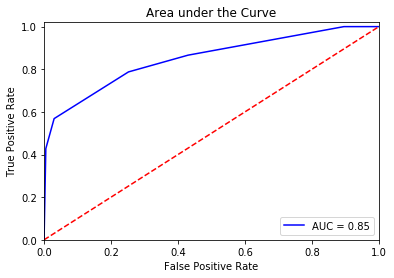

In [0]:
import matplotlib.pyplot as plt

# Graphical representaion of AUC 
print("Accuracy = ", accuracy_score(y_test, y_pred))
plt.title('Area under the Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 4)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.02])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Visualize Decision Tree 

In [0]:
from sklearn import tree
dot_data = tree.export_graphviz(clf,
                     out_file = "ratingDCTree.dot",
                     feature_names = features.columns.values,
                     filled=True, rounded=True, special_characters=True)

## Decision Tree Regression

In [0]:
# Import the model
from sklearn.tree import DecisionTreeRegressor

# Make an instance of the Model
clf = DecisionTreeRegressor(max_depth = 4)

# Train the model on the data 
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [0]:
# import the accuracy metrics 
from sklearn.metrics import accuracy_score

# predict the value of restaurant rating 
clf.predict(X_test.iloc[0].values.reshape(1, -1))

array([3.40215108])

In [0]:
from sklearn import tree
dot_data = tree.export_graphviz(clf,
                     out_file = "ratingDRTree.dot",
                     feature_names = features.columns.values,
                     filled=True, rounded=True, special_characters=True)

In [0]:
!dot -Tpng ratingDRTree.dot -o ratingDRTree.png

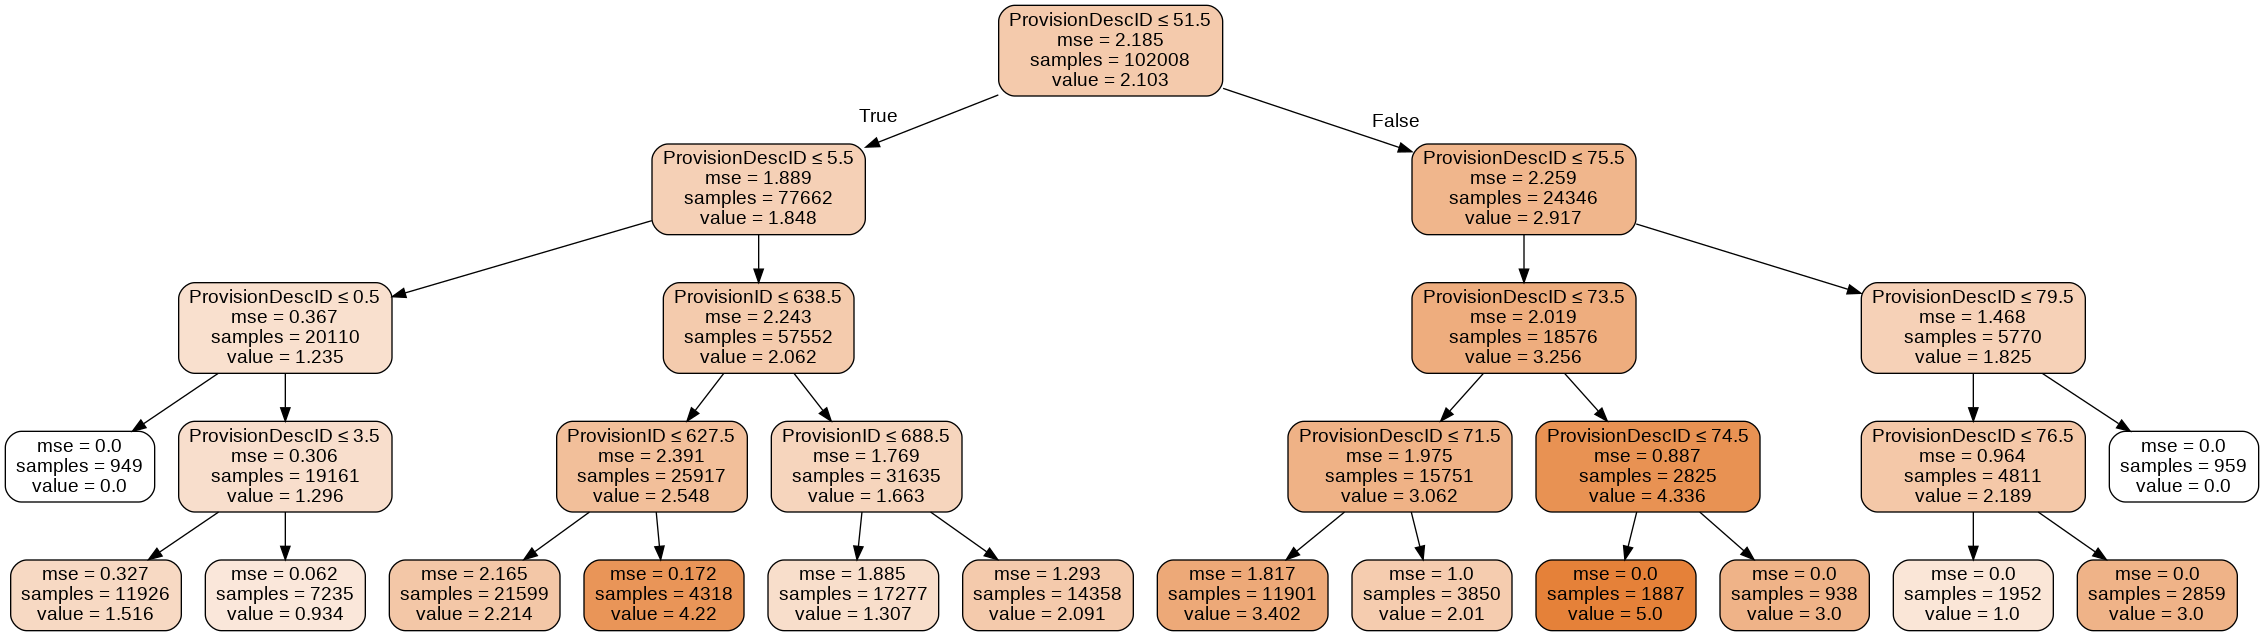

In [0]:
PATH = !pwd
Image(filename = PATH[0] + "/ratingDRTree.png")

**Conclusion**

Decision Tree Classifier is used for both binary and multivariate classification tasks. With the current solution we used binary classification task, which gives the different Provisions based on the other features with an accuracy of 75.79%.

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Random Forest



Data Set - https://chronicdata.cdc.gov/Policy/Table-of-Gross-Cigarette-Tax-Revenue-Per-State-Orz/rkpp-igza

Read revenue data from the data set and format them to a data frame for further processing.

In [0]:
revenue_file = 'Table_of_Gross_Cigarette_Tax_Revenue_Per_State.csv'
link = 'https://drive.google.com/open?id=1rnPEgZLwI3hdxFrn5BFaKUQysJrv7Vmk'
fluff, id_val = link.split('=')
print('File Name = ', revenue_file)
print('File ID = ', id_val)
downloaded = drive.CreateFile({'id':id_val}) 
downloaded.GetContentFile(revenue_file)  

df_revenue = pd.read_csv(revenue_file,low_memory=False)



File Name =  Table_of_Gross_Cigarette_Tax_Revenue_Per_State.csv
File ID =  1rnPEgZLwI3hdxFrn5BFaKUQysJrv7Vmk


In [0]:
df_revenue = df_revenue.sample(frac=1)
df_revenue = df_revenue.head(100000).reset_index(drop=True)
df_revenue.shape

(2499, 14)

In [0]:
df_revenue.head(2)

,LocationAbbr,LocationDesc,Year,Datasource,TopicDesc,MeasureDesc,Data_Value,Data_Value_Unit,Data_Value_Type,GeoLocation,Source,TopicTypeId,TopicId,MeasureId
0,TX,Texas,1974,OW,The Tax Burden on Tobacco,Cigarette Sales,"248,277,976",$,Dollars,"(31.827240407, -99.426770206)","Table 12- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS
1,UT,Utah,2011,OW,The Tax Burden on Tobacco,Cigarette Sales,"104,570,910",$,Dollars,"(39.360700171, -111.587130635)","Table 12- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS


In [0]:

df_revenue.head()
df_revenue.columns


Index(['LocationAbbr', 'LocationDesc', 'Year', 'Datasource', 'TopicDesc',
       'MeasureDesc', 'Data_Value', 'Data_Value_Unit', 'Data_Value_Type',
       'GeoLocation', 'Source', 'TopicTypeId', 'TopicId', 'MeasureId'],
      dtype='object')

In [0]:
def mapLatitudeLongitude(df):
    global latMapping, lonMapping
    lat = []
    lon = []
    for row in df['GeoLocation']:
        try:
            lat.append(row.split(',')[0].strip('('))
            lon.append(row.split(',')[1].strip(')'))
        except:
            lat.append(np.NaN)
            lon.append(np.NaN)
    df_revenue['Latitude'] = lat
    df_revenue['Longitude'] = lon

    lat = df_revenue['Latitude'].unique().tolist()
    lon = df_revenue['Longitude'].unique().tolist()
    latMapping = dict( zip(lat,range(len(lat))) )
    lonMapping = dict( zip(lon,range(len(lon))) )

mapLatitudeLongitude(df_revenue)  
df_revenue.head(2)

,LocationAbbr,LocationDesc,Year,Datasource,TopicDesc,MeasureDesc,Data_Value,Data_Value_Unit,Data_Value_Type,GeoLocation,Source,TopicTypeId,TopicId,MeasureId,Latitude,Longitude
0,TX,Texas,1974,OW,The Tax Burden on Tobacco,Cigarette Sales,"248,277,976",$,Dollars,"(31.827240407, -99.426770206)","Table 12- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS,31.827240407,-99.426770206
1,UT,Utah,2011,OW,The Tax Burden on Tobacco,Cigarette Sales,"104,570,910",$,Dollars,"(39.360700171, -111.587130635)","Table 12- Orzechowski and Walker, Tax Burden o...",POL,450POL,450CGS,39.360700171,-111.587130635


## Data Preprocessing

**Clean the data in data frame and choose only the features needed for further processing. Remove all the other columns.**

**Introduce a derived feature which shows true if revenue is increased and false if revenue is decreased.**

In [0]:

df_revenue = df_revenue.loc[:,['LocationAbbr', 'LocationDesc', 'Year','MeasureDesc','Data_Value', 'Latitude','Longitude']]
df_revenue['Data_Value'] = df_revenue['Data_Value'].replace( ',','', regex=True ).astype(int)
df_revenue['Data_Value'] = pd.to_numeric(df_revenue['Data_Value'])

In [0]:

df_revenue = df_revenue.sort_values(['LocationAbbr', 'LocationDesc', 'Year'], ascending=[True, True, False])

In [0]:
df_revenue['Revenue_Trend'] = df_revenue['Data_Value'].gt(df_revenue['Data_Value'].shift())
df_revenue.head(10)


,LocationAbbr,LocationDesc,Year,MeasureDesc,Data_Value,Latitude,Longitude,Revenue_Trend
1684,AK,Alaska,2018,Cigarette Sales,46021896,64.845079957001,-147.722059036,False
1473,AK,Alaska,2017,Cigarette Sales,48857026,64.845079957001,-147.722059036,True
1381,AK,Alaska,2016,Cigarette Sales,52573488,64.845079957001,-147.722059036,True
1758,AK,Alaska,2015,Cigarette Sales,52702165,64.845079957001,-147.722059036,True
2302,AK,Alaska,2014,Cigarette Sales,54624390,64.845079957001,-147.722059036,True
761,AK,Alaska,2013,Cigarette Sales,56983372,64.845079957001,-147.722059036,True
661,AK,Alaska,2012,Cigarette Sales,59586835,64.845079957001,-147.722059036,True
1689,AK,Alaska,2011,Cigarette Sales,61478147,64.845079957001,-147.722059036,True
2411,AK,Alaska,2010,Cigarette Sales,61237633,64.845079957001,-147.722059036,False
2356,AK,Alaska,2009,Cigarette Sales,62882219,64.845079957001,-147.722059036,True


In [0]:
df_revenue['Revenue_Trend'] = df_revenue['Revenue_Trend'].astype(int)
df_revenue.head()


,LocationAbbr,LocationDesc,Year,MeasureDesc,Data_Value,Latitude,Longitude,Revenue_Trend
1684,AK,Alaska,2018,Cigarette Sales,46021896,64.845079957001,-147.722059036,0
1473,AK,Alaska,2017,Cigarette Sales,48857026,64.845079957001,-147.722059036,1
1381,AK,Alaska,2016,Cigarette Sales,52573488,64.845079957001,-147.722059036,1
1758,AK,Alaska,2015,Cigarette Sales,52702165,64.845079957001,-147.722059036,1
2302,AK,Alaska,2014,Cigarette Sales,54624390,64.845079957001,-147.722059036,1


In [0]:
feature = df_revenue.drop(['Revenue_Trend','Latitude','Longitude'], axis=1)
trend = df_revenue['Revenue_Trend'].dropna()
feature.head()
trend.head()


1684    0
1473    1
1381    1
1758    1
2302    1
Name: Revenue_Trend, dtype: int64

In [0]:
feature.shape

(2499, 5)

In [0]:
trend.shape

(2499,)

In [0]:
feature_train, feature_test, trend_train, trend_test = train_test_split(feature, trend, test_size=0.33, random_state=66)

In [0]:
df_revenue.columns

Index(['LocationAbbr', 'LocationDesc', 'Year', 'MeasureDesc', 'Data_Value',
       'Latitude', 'Longitude', 'Revenue_Trend'],
      dtype='object')

**Perform feature engineering on the features to make them compatible for applying Random Forest Classifier.**

In [0]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

RSEED = 50
rfc = RandomForestClassifier(n_estimators=100, 
                               random_state = RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)



In [0]:
def mapLocationAbbr(df_revenue):

    location_attrb = df_revenue['LocationAbbr'].unique().tolist()
    mapping = dict( zip(location_attrb,range(len(location_attrb))) )
    df_revenue.replace({'location_attrb': mapping},inplace=True)

    LocationAbbrID = []
    for row in df_revenue['LocationAbbr']:
        try:
            LocationAbbrID.append(mapping[row.strip()])
        except:
            LocationAbbrID.append(np.NaN)
    df_revenue['LocationAbbrID'] = LocationAbbrID

mapLocationAbbr(df_revenue)

In [0]:
def mapLocationDesc(df_revenue):

    location_desc = df_revenue['LocationDesc'].unique().tolist()
    mapping = dict( zip(location_desc,range(len(location_desc))) )
    df_revenue.replace({'location_desc': mapping},inplace=True)

    location_desc_id = []
    for row in df_revenue['LocationDesc']:
        try:
            location_desc_id.append(mapping[row.strip()])
        except:
            location_desc_id.append(np.NaN)
    df_revenue['location_desc_id'] = location_desc_id

mapLocationDesc(df_revenue)

In [0]:
def mapProvisionDescId(df):

    provision_desc_id = df['ProvisionDesc'].unique().tolist()
    mapping = dict( zip(provision_desc_id,range(len(provision_desc_id))) )
    df.replace({'provision_desc_id': mapping},inplace=True)

    ProvisionDescID = []
    for row in df['ProvisionDesc']:
        try:
            ProvisionDescID.append(mapping[row.strip()])
        except:
            ProvisionDescID.append(np.NaN)
    df['ProvisionDescID'] = ProvisionDescID

mapProvisionDescId(df)

In [0]:
def mapMeasureDesc(df_revenue):

    measure_desc_id = df_revenue['MeasureDesc'].unique().tolist()
    mapping = dict( zip(measure_desc_id,range(len(measure_desc_id))) )
    df_revenue.replace({'measure_desc_id': mapping},inplace=True)

    measure_desc_id = []
    for row in df_revenue['MeasureDesc']:
        try:
            measure_desc_id.append(mapping[row.strip()])
        except:
            measure_desc_id.append(np.NaN)
    df_revenue['measure_desc_id'] = measure_desc_id

mapMeasureDesc(df_revenue)

In [0]:
df_revenue.head(2)

,LocationAbbr,LocationDesc,Year,MeasureDesc,Data_Value,Latitude,Longitude,Revenue_Trend,LocationAbbrID,location_desc_id,measure_desc_id
1684,AK,Alaska,2018,Cigarette Sales,46021896,64.845079957001,-147.722059036,0,0,0,0
1473,AK,Alaska,2017,Cigarette Sales,48857026,64.845079957001,-147.722059036,1,0,0,0


In [0]:
df_revenue = df_revenue[['LocationAbbrID','location_desc_id','measure_desc_id','Data_Value','Latitude','Longitude','Revenue_Trend']]

In [0]:
df_revenue.head()

,LocationAbbrID,location_desc_id,measure_desc_id,Data_Value,Latitude,Longitude,Revenue_Trend
1684,0,0,0,46021896,64.845079957001,-147.722059036,0
1473,0,0,0,48857026,64.845079957001,-147.722059036,1
1381,0,0,0,52573488,64.845079957001,-147.722059036,1
1758,0,0,0,52702165,64.845079957001,-147.722059036,1
2302,0,0,0,54624390,64.845079957001,-147.722059036,1


### Drop Columns if the trend is NaN

In [0]:
feature = df_revenue.drop(['Revenue_Trend','Latitude','Longitude'], axis=1)
trend = df_revenue['Revenue_Trend'].dropna()
feature.head()
trend.head()

1684    0
1473    1
1381    1
1758    1
2302    1
Name: Revenue_Trend, dtype: int64

In [0]:
feature = df_revenue.loc[:, df_revenue.columns != 'Revenue_Trend']
trend = df_revenue.loc[:, ['Revenue_Trend']]
trend.shape

(2499, 1)

In [0]:
feature_train, feature_test, trend_train, trend_test = train_test_split(feature, trend, test_size=0.33, random_state=66)

## Apply Random Forest Classifier

Apply Random forest classifier algorithm on selected preprocessed data frame. 

In [0]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

RSEED = 50
model = RandomForestClassifier(n_estimators=100, 
                               random_state = RSEED, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)


In [0]:
model.fit(feature_train, trend_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=50, verbose=1,
                       warm_start=False)

In [0]:
n_nodes = []
max_depths = []

for ind_tree in model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 974
Average maximum depth 23


In [0]:

train_rf_predictions = model.predict(feature_train)
train_rf_probs = model.predict_proba(feature_train)[:, 1]

rf_predictions = model.predict(feature_test)
rf_probs = model.predict_proba(feature_test)[:, 1]


[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    0.0s finished


In [0]:

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(trend_test, [1 for _ in range(len(trend_test))])
    baseline['precision'] = precision_score(trend_test, [1 for _ in range(len(trend_test))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(trend_test, predictions)
    results['precision'] = precision_score(trend_test, predictions)
    results['roc'] = roc_auc_score(trend_test, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(trend_train, train_predictions)
    train_results['precision'] = precision_score(trend_train, train_predictions)
    train_results['roc'] = roc_auc_score(trend_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(trend_test, [1 for _ in range(len(trend_test))])
    model_fpr, model_tpr, _ = roc_curve(trend_test, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

## Receiver Operating Characteristic (ROC)

Recall Baseline: 1.0 Test: 0.48 Train: 1.0
Precision Baseline: 0.44 Test: 0.47 Train: 1.0
Roc Baseline: 0.5 Test: 0.58 Train: 1.0


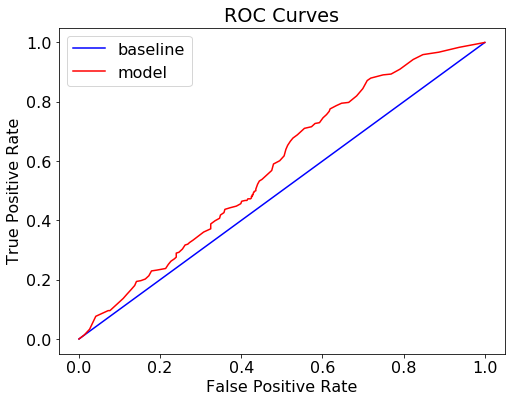

In [0]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

In [0]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)



## Confusion Matrix

Confusion matrix, without normalization
[[313 146]
 [173 193]]


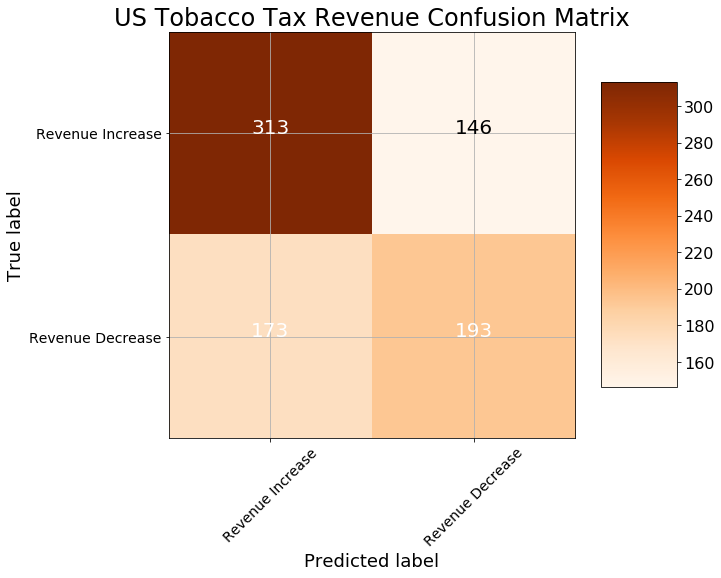

In [0]:

cm = confusion_matrix(trend_test, predictions)
plot_confusion_matrix(cm, classes = ['Revenue Increase', 'Revenue Decrease'],
                      title = 'US Tobacco Tax Revenue Confusion Matrix')

In [0]:
from sklearn.model_selection import RandomizedSearchCV

# Hyperparameter grid
param_grid = {
    'n_estimators': np.linspace(10, 200).astype(int),
    'max_depth': [None] + list(np.linspace(3, 20).astype(int)),
    'max_features': ['auto', 'sqrt', None] + list(np.arange(0.5, 1, 0.1)),
    'max_leaf_nodes': [None] + list(np.linspace(10, 50, 500).astype(int)),
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

# Estimator for use in random search
estimator = RandomForestClassifier(random_state = RSEED)

# Create the random search model
rs = RandomizedSearchCV(estimator, param_grid, n_jobs = -1, 
                        scoring = 'roc_auc', cv = 3, 
                        n_iter = 10, verbose = 1, random_state=RSEED)

# Fit 
rs.fit(feature_train, trend_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.7s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:715: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [0]:
rs.best_params_

{'bootstrap': True,
 'max_depth': 12,
 'max_features': 0.7999999999999999,
 'max_leaf_nodes': 33,
 'min_samples_split': 2,
 'n_estimators': 188}

In [0]:
best_model = rs.best_estimator_

In [0]:
train_rf_predictions = best_model.predict(feature_train)
train_rf_probs = best_model.predict_proba(feature_train)[:, 1]

rf_predictions = best_model.predict(feature_test)
rf_probs = best_model.predict_proba(feature_test)[:, 1]

In [0]:
n_nodes = []
max_depths = []

for ind_tree in best_model.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)
    
print(f'Average number of nodes {int(np.mean(n_nodes))}')
print(f'Average maximum depth {int(np.mean(max_depths))}')

Average number of nodes 65
Average maximum depth 10


Recall Baseline: 1.0 Test: 0.46 Train: 0.59
Precision Baseline: 0.44 Test: 0.56 Train: 0.74
Roc Baseline: 0.5 Test: 0.65 Train: 0.8


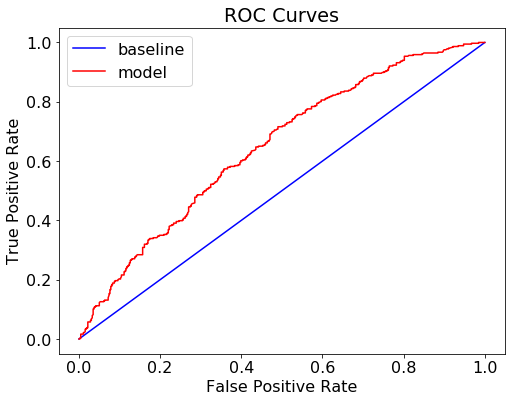

In [0]:
evaluate_model(rf_predictions, rf_probs, train_rf_predictions, train_rf_probs)

In [0]:
estimator = best_model.estimators_[1]

# Export a tree from the forest
export_graphviz(estimator, 'tree_from_optimized_forest.dot', rounded = True, 
                feature_names=feature_train.columns, max_depth = 8, 
                class_names = ['poverty', 'no poverty'], filled = True)

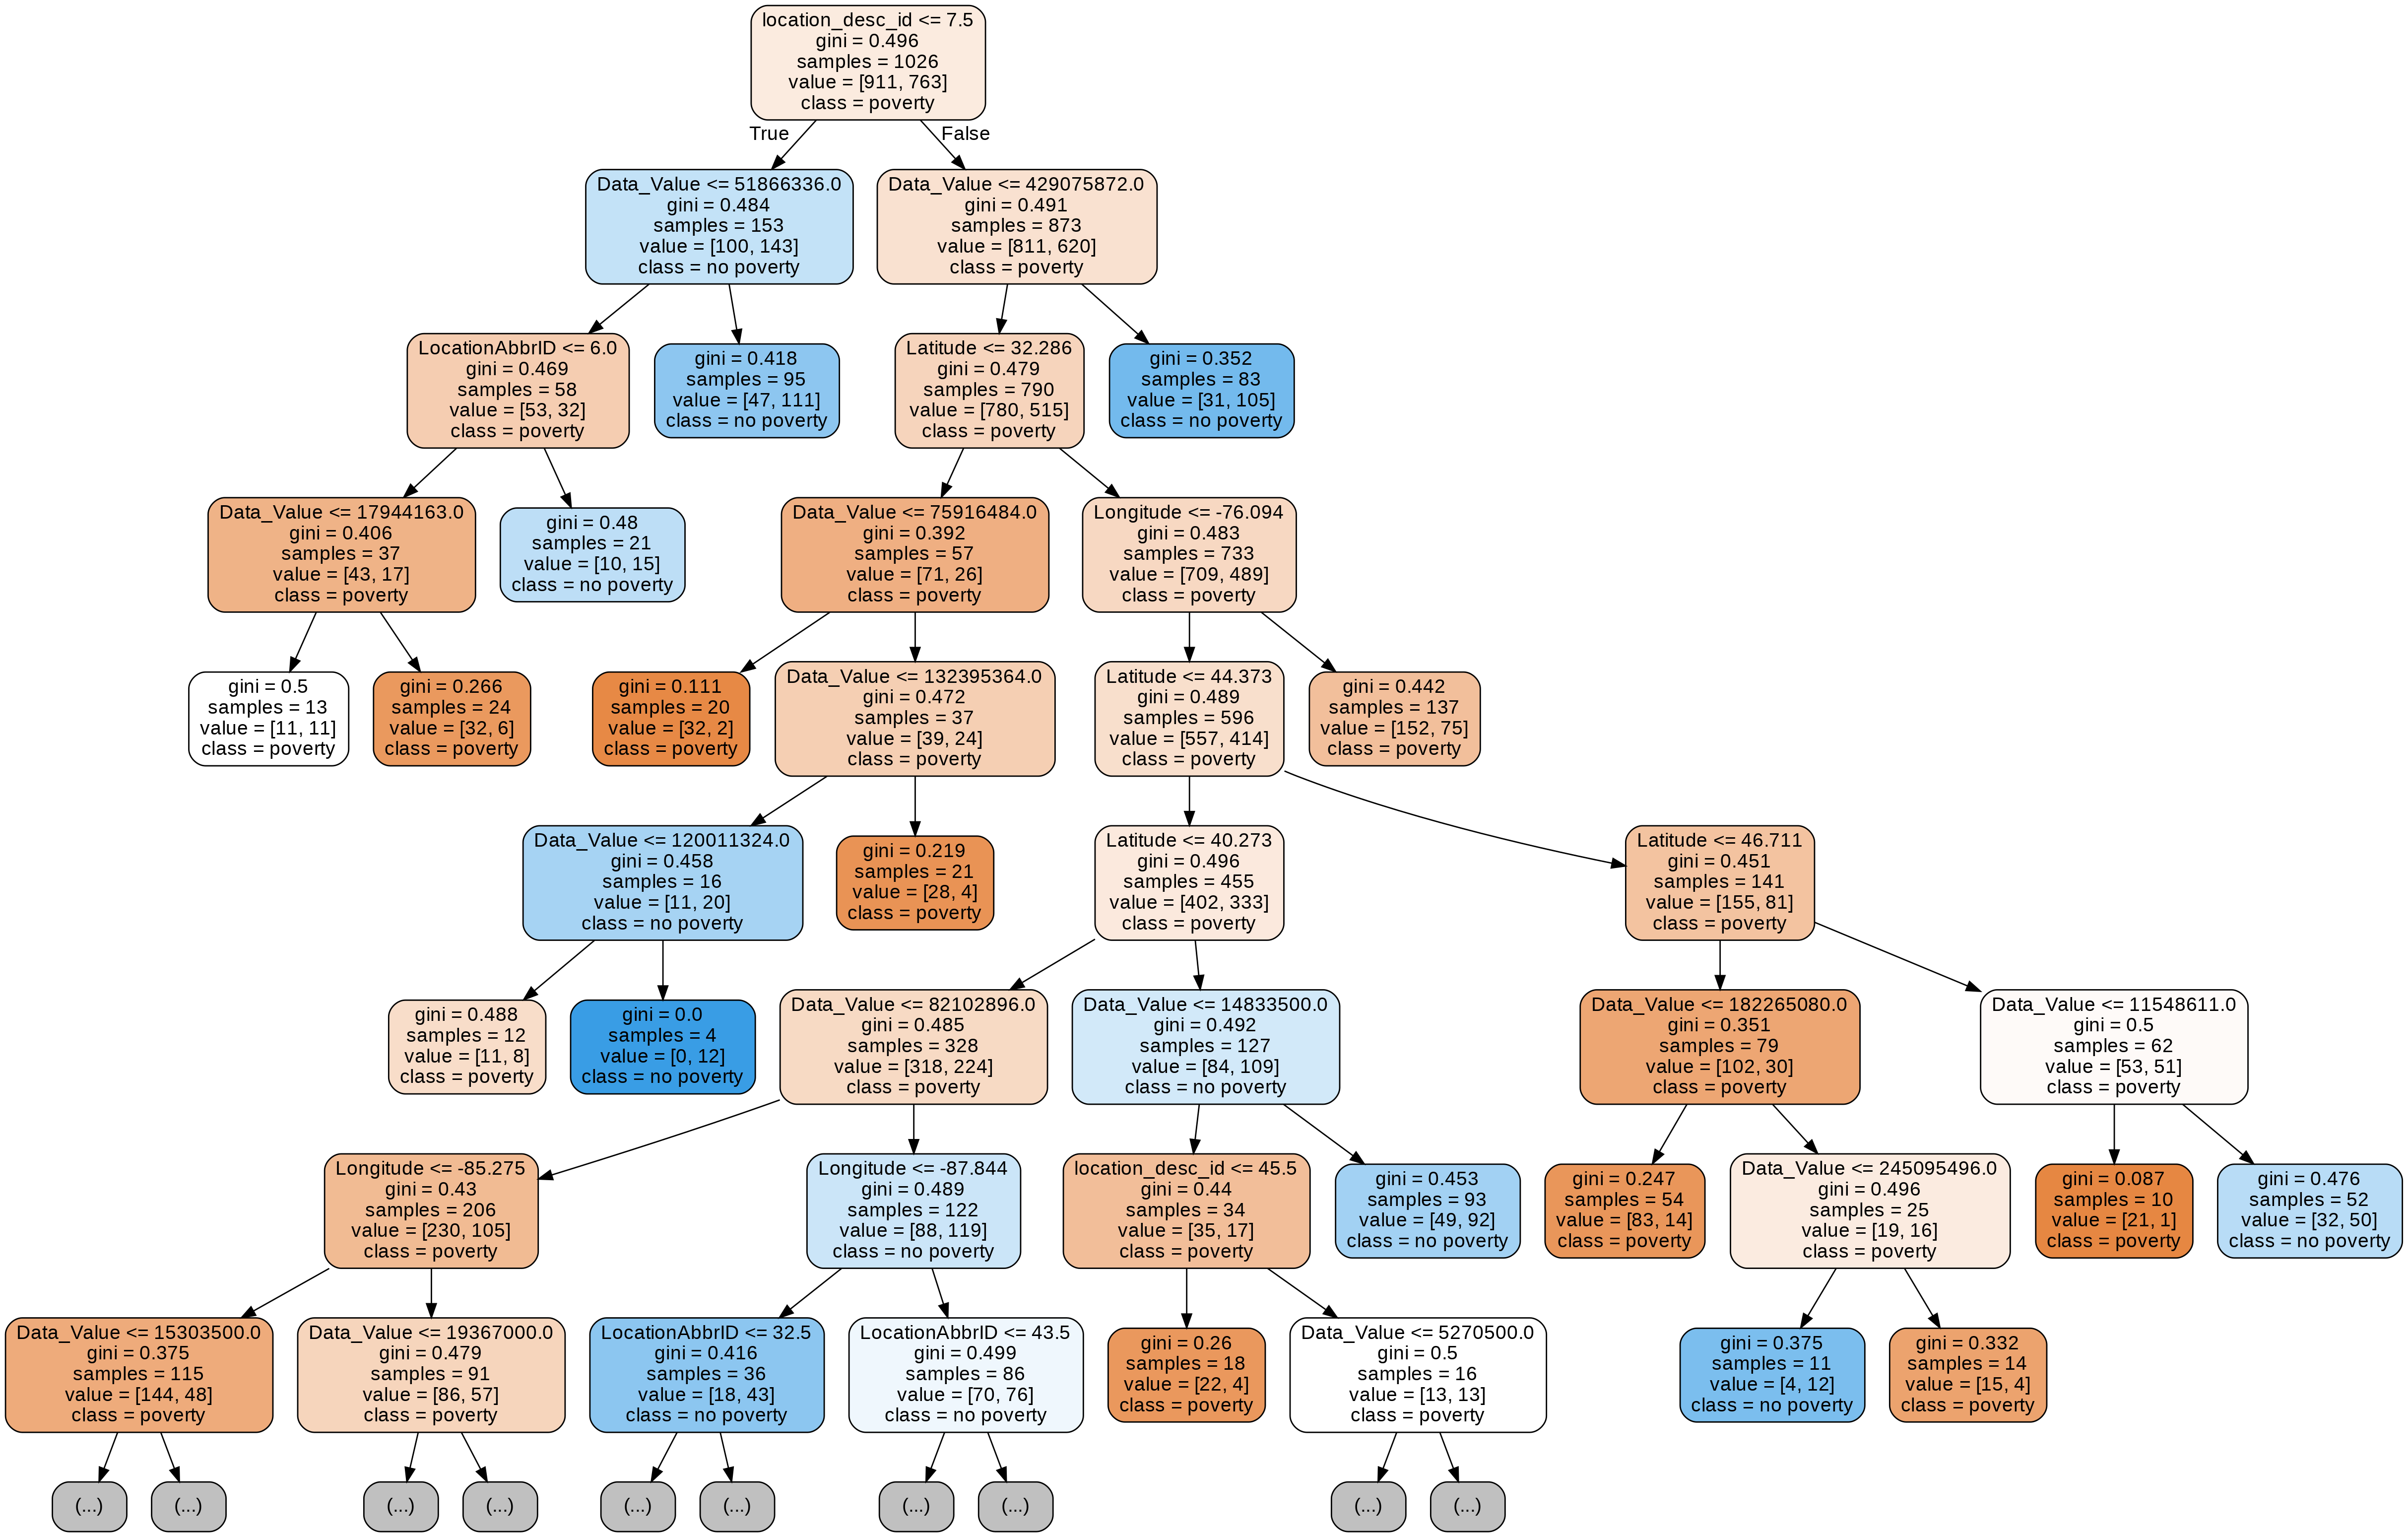

In [0]:

from subprocess import call
# Convert to png

call(['dot', '-Tpng', 'tree_from_optimized_forest.dot', '-o', 'tree_from_optimized_forest.png', '-Gdpi=200'])
Image('tree_from_optimized_forest.png')

In [0]:
feature_train, feature_test, trend_train, trend_test

1    49522
0    49445
Name: labels, dtype: int64